# B-Splines

- **B-splines** (short for **Basis splines**) use several Bézier curves joined end-on-end.

- A \( k \)-degree B-spline curve defined by \( n + 1 \) control points will consist of 
  \( n - k + 1 \) Bézier curves.

### Assumptions

An order \(k\) B-spline is formed by joining several pieces of polynomials of degree \(k - 1\) with at most \(C^{k-2}\) continuity at the breakpoints.


## Definition

- The equation for a B-spline curve of degree $k$ is defined by:

$$
S(t) = \sum_{i=0}^n N_{i,k}(t) P_i,
$$

where $(P_0, P_1, \ldots, P_n)$ are control points and $N_{i,k}(t)$ are the **basis functions** defined using the **Cox-de Boor recursion formula**:

$$
N_{i,0}(t) =
\begin{cases} 
1 & \text{if } t_i \leq t < t_{i+1}, \\
0 & \text{otherwise},
\end{cases}
$$

and for $j > 0$:

$$
N_{i,j}(t) =
\frac{t - t_i}{t_{i+j} - t_i} N_{i,j-1}(t) +
\frac{t_{i+j+1} - t}{t_{i+j+1} - t_{i+1}} N_{i+1,j-1}(t).
$$


#### The Knot Vector

- The values of $t_i$ are taken from a sequence called a **knot vector**:

$$
\mathbf{T} = (t_0, t_1, \ldots, t_m).
$$

- Values of $t$ are in the range $t \in [t_0, t_m]$.

- The knots that $t$ lies between determine the basis function that affects the shape of the B-spline.

- The number of knots in $\mathbf{T}$, $m + 1$, is related to the degree $k$ and the number of control points $n + 1$ by:

- If the knots are equidistant, then we have a **uniform B-spline**.


$$
m = k + n + 1.
$$

#### Example

If a uniform quadratic B-spline is defined with the control points $(P_0, P_1, P_2)$, then:

$$
m = k + n + 1 = 2 + 2 + 1 = 5,
$$

and:

$$
\mathbf{T} = (t_0, t_1, t_2, t_3, t_4, t_5) = (0, 1, 2, 3, 4, 5).
$$

- The B-spline curve is defined by:

$$
S(t) = \sum_{i=0}^{2} N_{i,2}(t) P_i.
$$

- Using the Cox-de Boor recursion formula, the triangular scheme is:

$$
N_{0,0}(t) \rightarrow N_{0,1}(t) \rightarrow N_{0,2}(t) \\
N_{1,0}(t) \rightarrow N_{1,1}(t) \\
N_{2,0}(t)
$$


- Evaluating the basis functions for $N_{0,2}(t)$ gives:

$$
N_{0,2}(t) = \frac{t - 0}{2 - 0} N_{0,1}(t) + \frac{3 - t}{3 - 1} N_{1,1}(t)
$$

$$
= \frac{t}{2} \left[ \frac{t - 0}{1 - 0} N_{0,0}(t) + \frac{2 - t}{2 - 1} N_{1,0}(t) \right]
+ \frac{3 - t}{2} \left[ \frac{t - 1}{2 - 1} N_{1,0}(t) + \frac{3 - t}{3 - 2} N_{2,0}(t) \right]
$$

$$
= \frac{1}{2} \left[
t^2 N_{0,0}(t) + t(2 - t) N_{1,0}(t) + (3 - t)(t - 1) N_{1,0}(t) + (3 - t)^2 N_{2,0}(t)
\right]
$$

$$
N_{0,2}(t) =
\begin{cases} 
\frac{1}{2} t^2 & \text{if } 0 \leq t < 1, \\ 
\frac{1}{2} \left[ -2(t - 1)^2 + 2(t - 1) + 2 \right] & \text{if } 1 \leq t < 2, \\ 
\frac{1}{2} \left[ (t - 2)^2 - 2(t - 2) + 1 \right] & \text{if } 2 \leq t < 3, \\ 
0 & \text{otherwise}.
\end{cases}
$$

$$
N_{1,2}(t) =
\begin{cases} 
\frac{1}{2} (t - 1)^2 & \text{if } 1 \leq t < 2, \\ 
\frac{1}{2} \left[ -2(t - 2)^2 + 2(t - 2) + 2 \right] & \text{if } 2 \leq t < 3, \\ 
\frac{1}{2} \left[ (t - 3)^2 - 2(t - 3) + 1 \right] & \text{if } 3 \leq t < 4, \\ 
0 & \text{otherwise}.
\end{cases}
$$

$$
N_{2,2}(t) =
\begin{cases} 
\frac{1}{2} (t - 2)^2 & \text{if } 2 \leq t < 3, \\ 
\frac{1}{2} \left[ -2(t - 3)^2 + 2(t - 3) + 2 \right] & \text{if } 3 \leq t < 4, \\ 
\frac{1}{2} \left[ (t - 4)^2 - 2(t - 4) + 1 \right] & \text{if } 4 \leq t < 5, \\ 
0 & \text{otherwise}.
\end{cases}
$$

In [44]:
import numpy as np
import torch
import matplotlib.pyplot as plt

Lets define our basis functions from example

In [45]:
# Define the basis functions as piecewise functions
def N_0_2(t):
    if 0 <= t < 1:
        return 0.5 * t**2
    elif 1 <= t < 2:
        return 0.5 * (-2 * (t - 1)**2 + 2 * (t - 1) + 2) - 0.5 # it just didnt work without the -0.5
    elif 2 <= t < 3:
        return 0.5 * ((t - 2)**2 - 2 * (t - 2) + 1)
    else:
        return 0

def N_1_2(t):
    if 1 <= t < 2:
        return 0.5 * (t - 1)**2
    elif 2 <= t < 3:
        return 0.5 * (-2 * (t - 2)**2 + 2 * (t - 2) + 2) - 0.5
    elif 3 <= t < 4:
        return 0.5 * ((t - 3)**2 - 2 * (t - 3) + 1)
    else:
        return 0

def N_2_2(t):
    if 2 <= t < 3:
        return 0.5 * (t - 2)**2
    elif 3 <= t < 4:
        return 0.5 * (-2 * (t - 3)**2 + 2 * (t - 3) + 2) - 0.5
    elif 4 <= t < 5:
        return 0.5 * ((t - 4)**2 - 2 * (t - 4) + 1)
    else:
        return 0

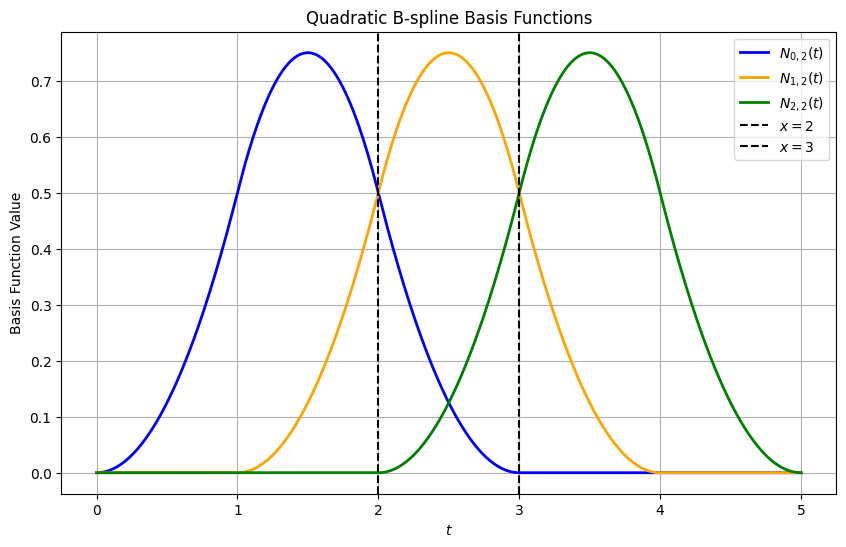

In [46]:
t_values = np.linspace(0, 5, 500)

# Evaluate the basis functions
N0 = np.array([N_0_2(t) for t in t_values])
N1 = np.array([N_1_2(t) for t in t_values])
N2 = np.array([N_2_2(t) for t in t_values])

# Plot the basis functions
plt.figure(figsize=(10, 6))
plt.plot(t_values, N0, label='$N_{0,2}(t)$', color='blue', linewidth=2)
plt.plot(t_values, N1, label='$N_{1,2}(t)$', color='orange', linewidth=2)
plt.plot(t_values, N2, label='$N_{2,2}(t)$', color='green', linewidth=2)

# Add vertical lines at x=2 and x=3
plt.axvline(x=2, color='black', linestyle='--', linewidth=1.5, label='$x=2$')
plt.axvline(x=3, color='black', linestyle='--', linewidth=1.5, label='$x=3$')

plt.title('Quadratic B-spline Basis Functions')
plt.xlabel('$t$')
plt.ylabel('Basis Function Value')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

Our B-spline is only defined on the interval [2,3]. Becouse all the basis functions are present only in that interval.


### Expressing Uniform Quadratic B-spline in Matrix Form

- Our uniform quadratic B-spline is only defined for $t \in [t_2, t_3] = [2, 3]$:

$$
N_{0,2}(t)P_0 = \frac{1}{2} \left[ (t - t_2)^2 - 2(t - t_2) + 1 \right] P_0,
$$

$$
N_{1,2}(t)P_1 = \frac{1}{2} \left[ -2(t - t_2)^2 + 2(t - t_2) + 1 \right] P_1,
$$

$$
N_{2,2}(t)P_2 = \frac{1}{2} (t - t_2)^2 P_2.
$$

 Which can be written in matrix form as:

$$
S(t) = 
\begin{pmatrix} 
P_0 & P_1 & P_2 
\end{pmatrix}
\frac{1}{2}
\begin{pmatrix}
1 & -2 & 1 \\
-2 & 2 & 0 \\
1 & 0 & 0
\end{pmatrix}
\begin{pmatrix}
t^2 \\ 
t \\ 
1
\end{pmatrix}.
$$

- In general terms, a uniform quadratic B-spline curve is written as:

$$
S_i(t) = 
\begin{pmatrix} 
P_i & P_{i+1} & P_{i+2}
\end{pmatrix}
\frac{1}{2}
\begin{pmatrix}
1 & -2 & 1 \\
-2 & 2 & 0 \\
1 & 0 & 0
\end{pmatrix}
\begin{pmatrix}
t^2 \\ 
t \\ 
1
\end{pmatrix},
$$

where $i = 0, 1, \ldots, n - k + 1$.

500


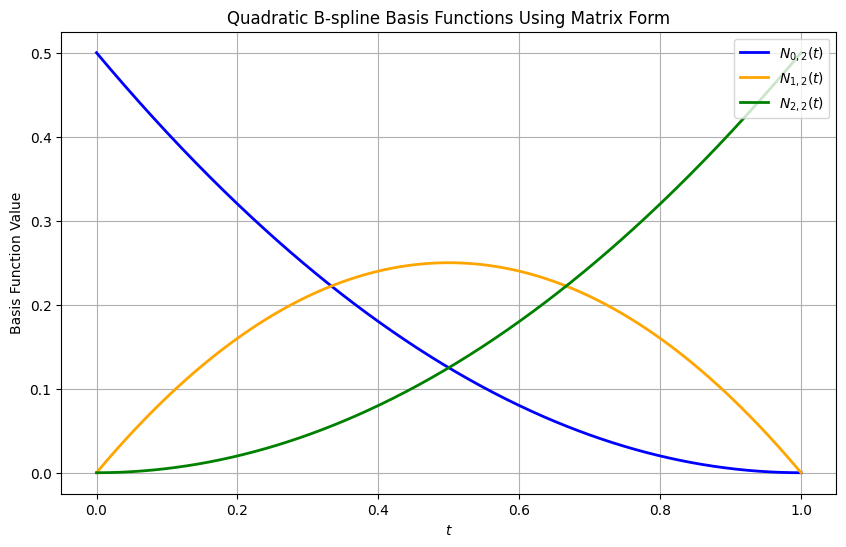

In [65]:
def basis_matrix(t):
    """
    Computes the basis functions using matrix multiplication for a given t.
    :param t: The current t value
    :return: Array of basis function values [N0, N1, N2]
    """
    B = np.array([
        [1, -2, 1],
        [-2, 2, 0],
        [1, 0, 0]
    ])

    print(len(t))

    T = np.array([t**2, t,  np.ones(len(t))])
    
    scale = 1 / 2
    
    N = scale * np.dot(B, T)
    return N

t_values = np.linspace(0, 1, 500)  

Ns =  basis_matrix(t_values)

plt.figure(figsize=(10, 6))

plt.plot(t_values, Ns[0, :], label='$N_{0,2}(t)$', color='blue', linewidth=2)
plt.plot(t_values, Ns[1, :], label='$N_{1,2}(t)$', color='orange', linewidth=2)
plt.plot(t_values, Ns[2, :], label='$N_{2,2}(t)$', color='green', linewidth=2)

plt.title('Quadratic B-spline Basis Functions Using Matrix Form')
plt.xlabel('$t$')
plt.ylabel('Basis Function Value')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


### Expressing Uniform B-splines in a recursive way

Knot vector: [0, 0, 0, 1, 1, 1]
first 10 x-values: [0.         0.00200401 0.00400802 0.00601202 0.00801603 0.01002004
 0.01202405 0.01402806 0.01603206 0.01803607]
last 10 x-values: [0.98196393 0.98396794 0.98597194 0.98797595 0.98997996 0.99198397
 0.99398798 0.99599198 0.99799599 1.        ]


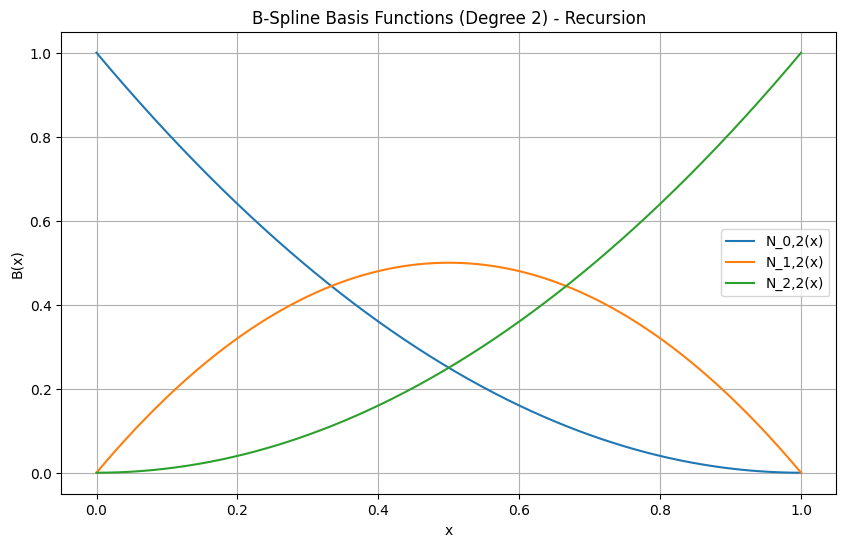

In [100]:

def basis_function(i, p, t, x):
    """
    Recursively computes the B-spline basis function N_{i,p}(x).

    Arguments:
    i : int
        Index of the basis function.
    p : int
        Degree of the B-spline.
    t : list of float
        Knot vector.
    x : float
        Position to evaluate the basis function.

    Returns:
    float
        Value of the basis function at x.
    """
    if p == 0:  # Base case: degree 0
        return 1.0 if t[i] <= x <= t[i + 1] else 0.0
    else:
        # Recursive definition
        left = (x - t[i]) / (t[i + p] - t[i]) if t[i + p] != t[i] else 0.0
        right = (t[i + p + 1] - x) / (t[i + p + 1] - t[i + 1]) if t[i + p + 1] != t[i + 1] else 0.0
        return left * basis_function(i, p - 1, t, x) + right * basis_function(i + 1, p - 1, t, x)

def plot_basis_functions(n, p):
    """
    Plots B-spline basis functions for a given number of control points and degree.

    Arguments:
    n : int
        Number of control points.
    p : int
        Degree of the B-spline.
    """
    t = [0] * p + list(range(n - p + 1)) + [n - p] * p

    print("Knot vector:", t)

    # Generate x values for plotting
    x_values = np.linspace(t[0], t[-1], 500)

    print("first 10 x-values:", x_values[:10])
    print("last 10 x-values:", x_values[-10:])

    # Plot each basis function
    plt.figure(figsize=(10, 6))
    for i in range(len(t) - p - 1):  # Number of basis functions
        y_values = [basis_function(i, p, t, x) for x in x_values]
        plt.plot(x_values, y_values, label=f'N_{i},{p}(x)')

    plt.title(f"B-Spline Basis Functions (Degree {p}) - Recursion")
    plt.xlabel("x")
    plt.ylabel("B(x)")
    plt.legend()
    plt.grid()
    plt.show()


n_control_points = 3  # Number of control points
degree = 2  # Degree of the B-spline
plot_basis_functions(n_control_points, degree)

### Interpolating points using splines

In [ ]:
def deBoor(k: int, x: float, t, c, p: int):
    """
    Evaluates S(x) using De Boor's algorithm.
    Implementation based on: https://en.wikipedia.org/wiki/De_Boor%27s_algorithm

    Arguments:
    k : int
        Index of knot interval that contains x.
    x : float
        Position at which to evaluate the spline.
    t : list of float
        Array of knot positions, padded appropriately.
    c : list of float
        Array of control points.
    p : int
        Degree of the B-spline.
    """
    d = [c[j + k - p] for j in range(p + 1)]
    for r in range(1, p + 1):
        for j in range(p, r - 1, -1):
            alpha = (x - t[j + k - p]) / (t[j + 1 + k - r] - t[j + k - p])
            d[j] = (1.0 - alpha) * d[j - 1] + alpha * d[j]
    return d[p]

def cox_deboor_spline(points, degree, num_samples=100):
    """
    Interpolates points using B-spline with De Boor's algorithm.

    Arguments:
    points : list of tuple
        Control points as (x, y) pairs.
    degree : int
        Degree of the B-spline.
    num_samples : int
        Number of samples to plot the curve.

    Returns:
    tuple of arrays
        Interpolated x and y coordinates.
    """
    n = len(points) - 1
    p = degree
    # Generate knot vector with uniform spacing and padding
    t = [0] * p + list(range(n - p + 2)) + [n - p + 1] * p
    print("knot_vector", t)
    c_x = [pt[0] for pt in points]
    c_y = [pt[1] for pt in points]

    # Generate samples in the valid range of t
    x_samples = []
    y_samples = []
    valid_range = (t[p], t[-p - 1])  # Valid range for x
    for x in np.linspace(*valid_range, num_samples):
        try:
            k = max([i for i in range(len(t) - 1) if t[i] <= x < t[i + 1]])
            x_samples.append(deBoor(k, x, t, c_x, p))
            y_samples.append(deBoor(k, x, t, c_y, p))
        except ValueError:
            # This can handle cases where x falls outside the valid range
            continue

    return np.array(x_samples), np.array(y_samples)

# Example usage

knot_vector [0, 0, 0, 0, 1, 2, 3, 3, 3, 3]


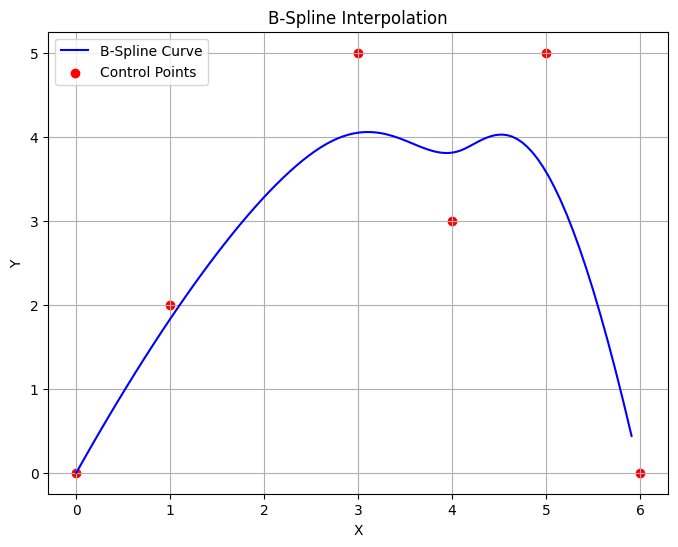

In [93]:

# Control points
points = [(0, 0), (1, 2), (3, 5), (4, 3), (5, 5), (6, 0)]
degree = 3  # Number of points fitting the bazier curve

x_spline, y_spline = cox_deboor_spline(points, degree)

plt.figure(figsize=(8, 6))
plt.plot(x_spline, y_spline, label="B-Spline Curve", color="blue")
plt.scatter(*zip(*points), color="red", label="Control Points")
plt.title("B-Spline Interpolation")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid()
plt.show()